# Analysis of variance (ANOVA)

Analysis of Variance (ANOVA) is a statistical method used to analyze the differences among group means in a sample. 

It is an extension of the t-test and is particularly useful when comparing means of more than two groups.
 
ANOVA tests the null hypothesis that all group means are equal against the alternative hypothesis that at least one group mean is different


**Key Concepts of ANOVA**
**Between-Groups Variability**
ANOVA assesses the variance between different groups and compares it to the variance within each group.

**F-Statistic**
ANOVA produces an F-statistic, which is the ratio of between-group variance to within-group variance. A high F-statistic suggests that the group means are significantly different.

**Post Hoc Tests**
If ANOVA indicates significant differences, post hoc tests (e.g., Tukey's HSD or Bonferroni correction) may be used to identify which specific group means are different.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kashti=sns.load_dataset('titanic')

In [3]:
kashti.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

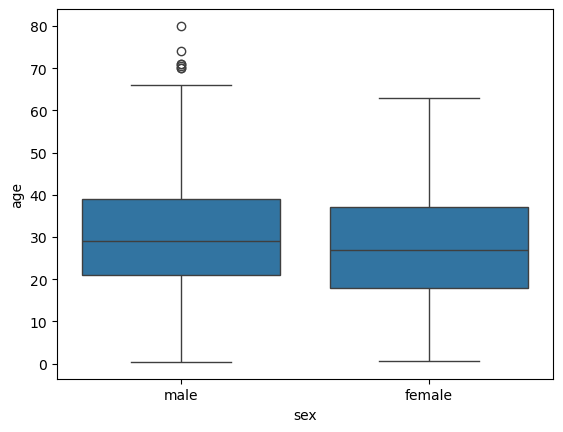

In [4]:
sns.boxplot(x='sex',y='age',data=kashti)

<Axes: xlabel='class', ylabel='age'>

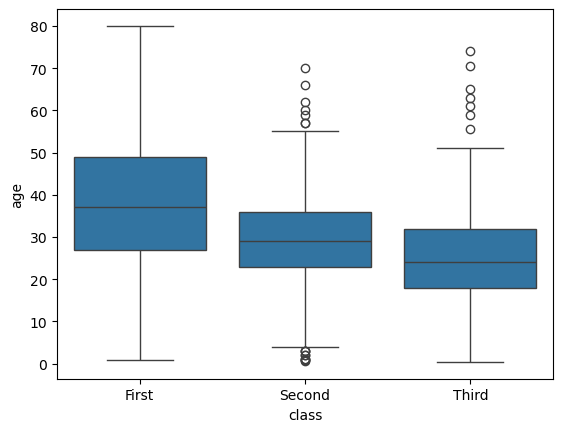

In [5]:
sns.boxplot(x='class',y='age',data=kashti)

In [6]:
phool=sns.load_dataset('iris')

In [7]:
phool.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
phool.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
phool.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='sepal_length'>

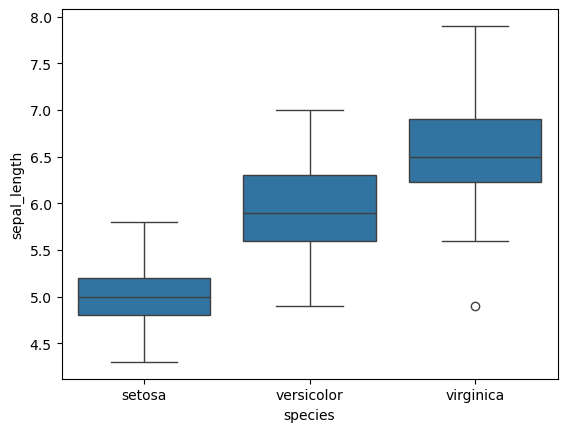

In [10]:
sns.boxplot(x='species',y='sepal_length',data=phool)

**One-Way ANOVA:**
Used when there is one independent variable (factor) with more than two levels (groups).
Tests if there are any statistically significant differences between the means of the groups.
Hypotheses:
Null Hypothesis (H0​): The means of all groups are equal.
Alternative Hypothesis (H1​): At least one group mean is different.
Example:
Testing if there is a significant difference in test scores among students who used three different teaching methods.


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
# One way ANOVA
mod = ols('sepal_length ~ species', data=phool).fit()
mod


In [13]:
aov_table = sm.stats.anova_lm(mod, typ=2) # type 2 meaning, the effect of one factor is adjusted for the effect of the other factors
print(aov_table)
if aov_table['PR(>F)'][0] < 0.05:
    print('Reject null hypothesis')

             sum_sq     df           F        PR(>F)
species   63.212133    2.0  119.264502  1.669669e-31
Residual  38.956200  147.0         NaN           NaN
Reject null hypothesis


C:\Users\adeel\AppData\Local\Temp\ipykernel_7240\2330325925.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if aov_table['PR(>F)'][0] < 0.05:


**Two-Way ANOVA:**
Used when there are two independent variables (factors) and their interaction on a dependent variable.
Can assess the main effects of each independent variable and their interaction effect.\
Hypotheses:\
Null Hypothesis (H0​): There is no significant difference in means due to factors or their interaction.\
Alternative Hypothesis (H1​): There is a significant difference in means due to factors or their interaction.
Example:
Testing if there is an interaction between two factors (e.g., treatment and gender) on a response variable (e.g., blood pressure).


# Pairwise comparison

In [14]:
pair_t=mod.t_test_pairwise('species', method='bonferroni')
pair_t.result_frame


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
versicolor-setosa,0.930,0.102958,9.032819,8.770194e-16,0.726531,1.133469,2.631058e-15,True
virginica-setosa,1.582,0.102958,15.365506,2.214821e-32,1.378531,1.785469,6.644464e-32,True
virginica-versicolor,0.652,0.102958,6.332686,2.765638e-09,0.448531,0.855469,8.296915e-09,True


# Tukey HSD test

In [15]:

# pip install pingouin


In [19]:
!pip install pingouin
import pingouin as pg
# First develop anova table
aov=pg.anova(dv='sepal_length', between='species', data=phool, detailed=True)
print(aov)
if aov['p-unc'][0] < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 220.7 kB/s eta 0:00:04
   ----------------- ---------------------- 0.5/1.2 MB 220.7 kB/s eta 0:00:04
   -------------

In [ ]:
# Tukey HSD test
pt=pg.pairwise_tukey(dv='sepal_length', between='species', data=phool)
print(pt)
if pt['p-tukey'][0] < 0.05:
    print('Reject null hypothesis')

            A           B  mean(A)  mean(B)   diff        se          T  \
0      setosa  versicolor    5.006    5.936 -0.930  0.102958  -9.032819   
1      setosa   virginica    5.006    6.588 -1.582  0.102958 -15.365506   
2  versicolor   virginica    5.936    6.588 -0.652  0.102958  -6.332686   

        p-tukey    hedges  
0  2.420286e-14 -2.088053  
1  2.153833e-14 -3.053629  
2  8.287554e-09 -1.117195  
Reject null hypothesis


# Manova

Multivariate Analysis of Variance (MANOVA) is a statistical technique used to simultaneously analyze the differences in mean values of two or more dependent variables between multiple groups. 

It is an extension of Analysis of Variance (ANOVA) and is applicable when there are two or more dependent variables involved in the study.
 
MANOVA allows researchers to determine whether there are statistically significant differences in mean vectors (patterns of means across variables) among groups.

Hypotheses in MANOVA:
Null Hypothesis (H0​):
There are no significant differences in mean vectors among the groups for the set of dependent variables.
Alternative Hypothesis (H1​):
There are significant differences in mean vectors among the groups for the set of dependent variables.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA

In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
Manova=MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ species', data=df)

In [ ]:
print(Manova.mv_test())


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00